# TITANIC 

In [1]:
#import data
import pandas as pd
data=pd.read_csv("C:/Users/User/Documents/titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**- Check the missing value**

first, we check the missing value in this dataset

In [2]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

    There are missing values in the Age and Cabin columns. We have to do imputation to deal with the missing value. Before that, we must know the type of missing value

In [3]:
#check which column is categorical or number
for i in data.columns.tolist():
    print('the column',i,'has',len(data[i].unique().tolist()),'unique value')

the column PassengerId has 891 unique value
the column Survived has 2 unique value
the column Pclass has 3 unique value
the column Name has 891 unique value
the column Sex has 2 unique value
the column Age has 89 unique value
the column SibSp has 7 unique value
the column Parch has 7 unique value
the column Ticket has 681 unique value
the column Fare has 248 unique value
the column Cabin has 148 unique value
the column Embarked has 4 unique value


    Based on the results above, sex, survived, Pclass, and Embarked columns are categorical type variables and the age and fare columns are of type number

In [4]:
#check type of missing value, we sort value based on categorical and number
import missingno as msno
msno.matrix(data.sort_values('Pclass'))

        After sorting, the distribution of missing values is spread across all areas in the age column. So, the type missing value at the age of the MCAR type. 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

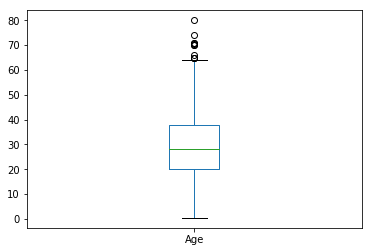

In [5]:
#Check the distributin age column
data['Age'].plot(kind='box')
data['Age'].describe()

    The condition of age column : 
- MCAR (Missing Completely at Random): The missing values in the age column are random and not related to any other column.
- No Relationship with Other Columns: The age column does not have any relationship with other variables, so using those variables for imputation is not effective.
- Normal Distribution with Outliers: The age column is approximately normally distributed but contains some outliers.

   We use Random Sampling from Observed Values, so we can maintains the original distribution and variability of the data, making it suitable for MCAR data with outliers.

In [6]:
#imputation Age column
import numpy as np
data_clean=data.copy()
data_clean['Age']=data_clean['Age'].apply(lambda x : np.random.choice(data_clean['Age'].dropna()) if pd.isnull(x) else x)
data_clean.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

    there is no missing value in age column, but still there for cabin column has 687 missing value of 891 total rows. this means that approximately 77% of the data in this column is missing. Deciding whether to impute or remove the column depends on several factors, including the importance of the column, its relationship to other variables, and the potential impact of missing data on your analysis or model.

In [7]:
#check relationship cabin and survived
data_clean['Cabin_present']=data['Cabin'].notnull().astype(int)
cabin_survival=data_clean.groupby('Cabin_present')['Survived'].mean()
cabin_survival

Cabin_present
0    0.299854
1    0.666667
Name: Survived, dtype: float64

In [8]:
data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_present
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


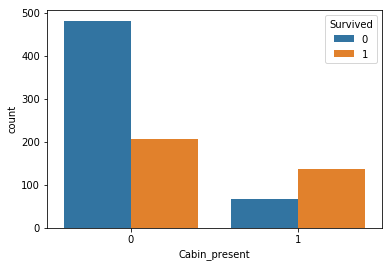

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.countplot(x='Cabin_present',hue='Survived',data=data_clean)
plt.show()

    After we check the relationship between cabin present and survived, the result is that when cabin present does not exist, the number of survived statuss 0 is higher, while when there is a cabin present, the number of survived statuses 1 is higher than survived 0, meaning there is a relationship with survived
    But there are Pclass so we check relationshop between Pclass and cabin present

In [10]:
data_clean[['Pclass','Cabin_present']].corr()

,Pclass,Cabin_present
Pclass,1.000000,-0.725541
Cabin_present,-0.725541,1.000000


    this relationship indices strong negative relationship. Passengger with have cabin information is Pclass 1, meanwhile 3rd class (Pclass = 3) passengers are less likely to have cabin information. Cabin present is powerful provide the information so we can drop Cabin column

In [11]:
#embarked missing value
data_clean.loc[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_present
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


In [12]:
ind=data_clean['Cabin'].str.contains("B",na=False)
check=data_clean[ind]
check['Embarked'].value_counts()

S    23
C    22
Name: Embarked, dtype: int64

    karena hanya 2 missing value dan potensi hilang di tiket cabin B hanya berasal dari 2 saja yaitu S dan C, dan setelah kita hitung S dan C memiliki nilai seimbang berdasarkan cabin B maka kita masing2 menambah satu dari S dan satu dari C

In [13]:
idx=data_clean.loc[data['Embarked'].isna()].index
em=['S','C']
for i,j in zip(idx,em):
    data_clean.loc[i,'Embarked']=j


In [14]:
data_cleaned=data_clean.drop(columns=['Cabin'])
data_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_present
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


**EDA**

- variabel fare vs categorical variable

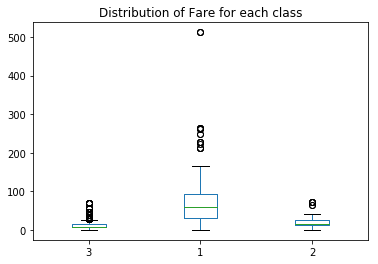

In [15]:
#Pclass
P_class=data_cleaned['Pclass'].unique().tolist()
kum={}
for i in P_class:
    ambil=data_cleaned[data_cleaned['Pclass']==i]['Fare']
    kum[i]=ambil
data_fare=pd.DataFrame(kum)
data_fare.plot(kind='box',title='Distribution of Fare for each class')

    The distribution of class 1 for this variable is wider and there are outliers at a maximum of 500, while in classes 3 and 2 the distribution of data is almost the same and each has an outlier. passenger use class 1 have social and economic higher than class 3 and 2

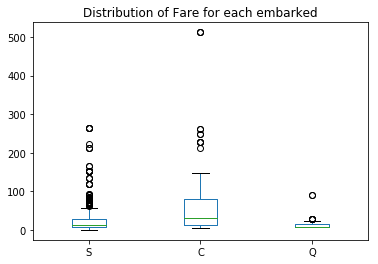

In [16]:
#Embarked
embark=data_cleaned['Embarked'].unique().tolist()
kum={}
for i in embark:
    ambil=data_cleaned[data_cleaned['Embarked']==i]['Fare']
    kum[i]=ambil
data_emb=pd.DataFrame(kum)
data_emb.plot(kind='box',title='Distribution of Fare for each embarked')

    Penumpang yang naik dari pelabuhan C memiliki tingkat ekonomi yang luas dan lebih tinggi dibandingkan dengan penumpang yang naik dari pelabuhan S dan q

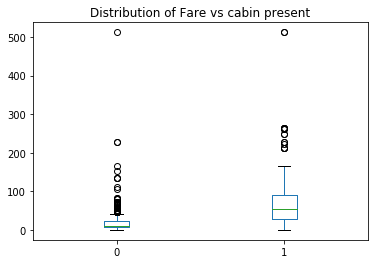

In [17]:
#cabin present
cab=data_cleaned['Cabin_present'].unique().tolist()
kum={}
for i in cab:
    ambil=data_cleaned[data_cleaned['Cabin_present']==i]['Fare']
    kum[i]=ambil
data_cab=pd.DataFrame(kum)
data_cab.plot(kind='box',title='Distribution of Fare vs cabin present')

    penghasilan penumpang yang memiliki informasi cabin lebih tinggi dibandingkan dengan penumpang yang tidak memiliki informasi cabin

- demografi vs other categorical 

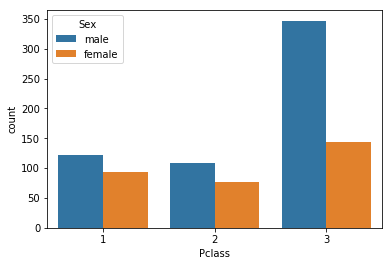

In [18]:
#pclass vs sex
sns.countplot(x='Pclass',hue='Sex',data=data_cleaned)
plt.show()

    penumpang laki-laki pada kelas 1 dan 2 tidak terpaut jelas, sedangkan kelas 3 didominasi oleh laki-laki

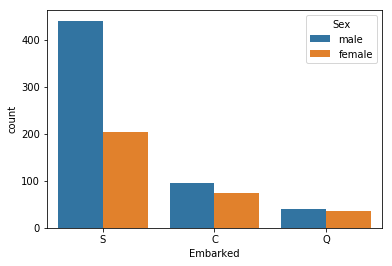

In [19]:
#pclass vs Embarked
sns.countplot(x='Embarked',hue='Sex',data=data_cleaned)
plt.show()

    Penumpang kapal ini didominasi dari pelabuhan S baik pria dan wanita, dan paling sedikit berasal dari penumpang naik pelabuhan Q

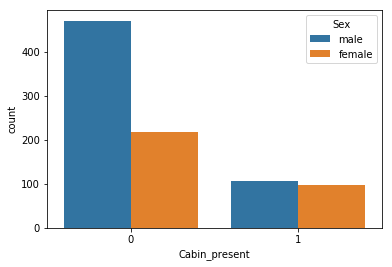

In [20]:
#pclass vs CABIN present
sns.countplot(x='Cabin_present',hue='Sex',data=data_cleaned)
plt.show()

    Laki-laki mendominasi pada ketiadaan informasi cabin, sedangkan penumpang pria dan wanita jumlahnya sama untuk yang memiliki informasi cabin

- target variabel vs categorical or number variable

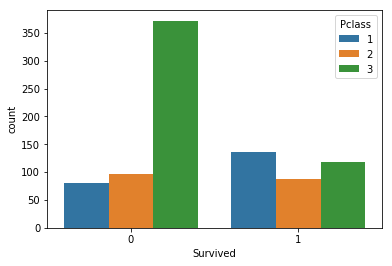

In [21]:
#pclass vs survived
sns.countplot(x='Survived',hue='Pclass',data=data_cleaned)
plt.show()

    dari kelas 3 penyumbang penumpang paling banyak yang tidak bisa menyelamatkan diri, sedangkan untuk yang statusnya selamat dari 3 kelas, penumpang dari kelas 1 menjadi penyumbang terbesar. disebabkan karena fasilitas, jarak, akses ke alat penyelamatan berbeda untuk tiap kelas

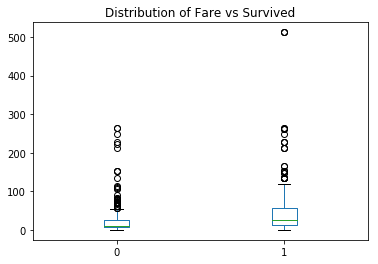

In [22]:
#fare vs survived
surv=data_cleaned['Survived'].unique().tolist()
kum={}
for i in surv:
    ambil=data_cleaned[data_cleaned['Survived']==i]['Fare']
    kum[i]=ambil
data_cab=pd.DataFrame(kum)
data_cab.plot(kind='box',title='Distribution of Fare vs Survived')

        Persebaran baik status survived 1 lebih luas dibandingkan dengan survived 0. artinya tingkat ekonomii bisa juga menentukan selamat/tidak dengan membeli fasilitas penumpang yang lebih aman

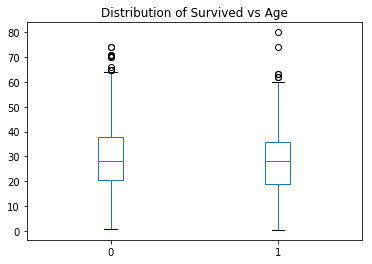

In [23]:
#Age vs survived
surv=data_cleaned['Survived'].unique().tolist()
kum={}
for i in surv:
    ambil=data_cleaned[data_cleaned['Survived']==i]['Age']
    kum[i]=ambil
data_cab=pd.DataFrame(kum)
data_cab.plot(kind='box',title='Distribution of Survived vs Age')

     Persebaran untuk umur pada statu survived tidak jauh berbeda

- variabel Sibsp dan parch

    Variabel ini sibsp menunjukan jumlah saudara atau istri/suami yangdibawa bersama penumpang sedangkan Parch ini adalah orang tua atau anak yang dibawa penumpang. Kita bisa membuat kolom baru bernama total with passengger dengan menjumlahkan variabel tersebut

In [24]:
#1 merupakan penumpang sendiri
data_cleaned['total_with_passengger']=data_cleaned['SibSp']+data_cleaned['Parch']+1

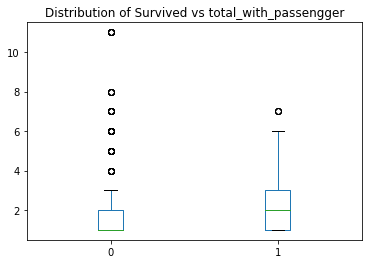

In [25]:
#total with passengger vs survived
surv=data_cleaned['Survived'].unique().tolist()
kum={}
for i in surv:
    ambil=data_cleaned[data_cleaned['Survived']==i]['total_with_passengger']
    kum[i]=ambil
data_tot=pd.DataFrame(kum)
data_tot.plot(kind='box',title='Distribution of Survived vs total_with_passengger')

    Untuk status survived 0, terdapat outlier dengan jumlah banyak terlihat sampai maksimal 11 orang artinya banyak penumpang yang membawa orang lain peluang selamat kecil. 

**LOGISTIC REGRESSION**

In [26]:
target_var=data_cleaned['Survived'].unique().tolist()
target_var

[0, 1]

    Kenapa kita menggunakan logistic regression karena target variabel hanya 2 jenis saja 1 dan 0. Sebelum melakukan logistic regression, kita akan mentransformasi kategorikal data menjadi bentuk angka agar mesin pembelajaran dapat bekerja

In [27]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId              891 non-null int64
Survived                 891 non-null int64
Pclass                   891 non-null int64
Name                     891 non-null object
Sex                      891 non-null object
Age                      891 non-null float64
SibSp                    891 non-null int64
Parch                    891 non-null int64
Ticket                   891 non-null object
Fare                     891 non-null float64
Embarked                 891 non-null object
Cabin_present            891 non-null int32
total_with_passengger    891 non-null int64
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 87.1+ KB


    dari kolom diatas kita akan transformasi kolom embarked dan Sex. Pclass tidak karena sudah berbentuk angka dan jenis variabelnya adalah ordinal.

In [28]:
#transform sex column
data_cleaned['Sex']=data_cleaned['Sex'].apply(lambda x : 0 if 'male' else 1)

In [29]:
#transform embarked
data_tr=pd.get_dummies(data_cleaned,columns=['Embarked'],drop_first=True)
data_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_present,total_with_passengger,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,2,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,2,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,0,1


(<matplotlib.axes._subplots.AxesSubplot at 0x19135df1048>,)

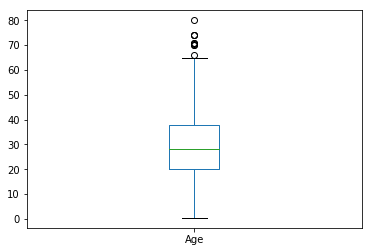

In [30]:
#SCALING 
data_tr['Age'].plot(kind='box'), 

In [31]:
#count outlier
tab=data_tr['Age'].describe()
iqr=tab['75%']-tab['25%']
lower_b=tab['25%']-(1.5*iqr)
upper_b=tab['75%']+(1.5*iqr)
outlier=data_tr[(data_tr['Age']<lower_b) | (data_tr['Age']>upper_b)]
outlier.shape[0]

10

    Distribusi data umur tampaknya normal namun terdapat 14 outlier dari 891 data. Outlier yang terjadi juga dilihat tidak ekstrem. Sehingga kita akan menggunakan Standarization

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_tr['age_scaled']=scaler.fit_transform(np.array(data_tr['Age']).reshape(-1,1))
data_trf=data_tr.drop(['Age'],axis=1)
data_trf.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin_present,total_with_passengger,Embarked_Q,Embarked_S,age_scaled
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,0,2,0,1,-0.515988
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,1,2,0,0,0.593460
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,0,1,0,1,-0.238626
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,1,2,0,1,0.385438
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,0,1,0,1,0.385438


(<matplotlib.axes._subplots.AxesSubplot at 0x1913600bef0>,)

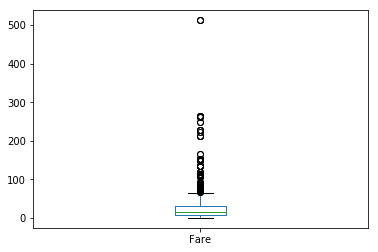

In [33]:
#SCALING 
data_trf['Fare'].plot(kind='box'), 

    Distribusi fare seperti nya terlihat skewed dan outlier dalam jumlah besar dan sifatnya ekstrem, sehingga kita menggunakan robust scaling

In [34]:
from sklearn.preprocessing import RobustScaler
scaler_r=RobustScaler()
data_trf['fare_scaled']=scaler_r.fit_transform(np.array(data_trf['Fare']).reshape(-1,1))
data_red=data_trf.drop(['Fare'],axis=1)
data_red.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin_present,total_with_passengger,Embarked_Q,Embarked_S,age_scaled,fare_scaled
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,0,2,0,1,-0.515988,-0.312011
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,1,2,0,0,0.593460,2.461242
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,0,1,0,1,-0.238626,-0.282777
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,1,2,0,1,0.385438,1.673732
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,0,1,0,1,0.385438,-0.277363


In [35]:
#drop Name, ticket, sibsp, dan Parch
data_ml=data_red.drop(['Name','SibSp','Parch','Ticket'],axis=1)
data_ml.head()

,PassengerId,Survived,Pclass,Sex,Cabin_present,total_with_passengger,Embarked_Q,Embarked_S,age_scaled,fare_scaled
0,1,0,3,0,0,2,0,1,-0.515988,-0.312011
1,2,1,1,0,1,2,0,0,0.593460,2.461242
2,3,1,3,0,0,1,0,1,-0.238626,-0.282777
3,4,1,1,0,1,2,0,1,0.385438,1.673732
4,5,0,3,0,0,1,0,1,0.385438,-0.277363


    terlihat bahwa variabel categorical sudah berbentuk angka dan data numerik sudah distandarisasi

- Logistic regression

    kita menggunakan logistic regression karena data variabel target berbentuk biner 0 dan 1. Selain itu, kita dapat menggunakan Neural Network. Untuk menguji model kita menggunakan cross validation alasannya:
    1. lebih relaible, karena cv menggunakan test data yang berbeda-beda
    2. mengurangi variance, dengan menghitung rata-rata dari semua percobaan

In [36]:
print(len(data_ml))

891


In [37]:
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(max_iter=1000)
X=data_ml[[i for i in data_ml.columns.tolist() if i !='Survived' and i!='PassengerId']]
y=data_ml['Survived']
cv=StratifiedKFold(n_splits=5)
trainSize,trainScore,testScore=learning_curve(model,X,y,cv=cv,scoring='accuracy')
import numpy as np
mean_trainScore=np.mean(trainScore,axis=1)
mean_testScore=np.mean(testScore,axis=1)

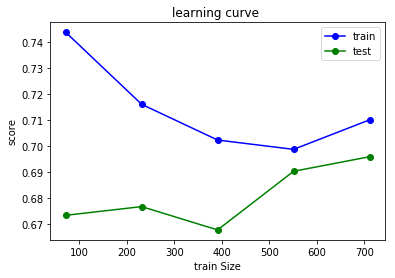

In [38]:
from matplotlib import pyplot as plt
plt.plot(trainSize,mean_trainScore,color='b',marker='o',label='train')
plt.plot(trainSize,mean_testScore,color='g',marker='o',label='test')
plt.title('learning curve ')
plt.xlabel('train Size')
plt.ylabel('score')
plt.legend()

    gambar diatas model mengalami overfitting dimana model bekerja bagus pada training dataset namun performanya buruk pada test dataset. Untuk mengatasi ini kita menggunakan regularization

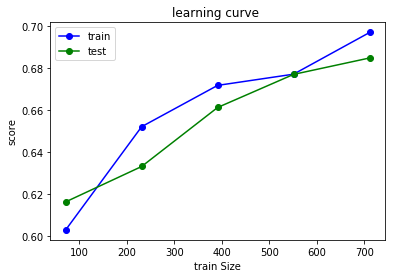

In [39]:
#using regularization
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
model_l= LogisticRegression(penalty='l2',C=0.01)
X=data_ml[[i for i in data_ml.columns.tolist() if i !='Survived' and i!='PassengerId']]
y=data_ml['Survived']
cv=StratifiedKFold(n_splits=5)
trainSize,trainScore,testScore=learning_curve(model_l,X,y,cv=cv,scoring='accuracy')
import numpy as np
mean_trainScore=np.mean(trainScore,axis=1)
mean_testScore=np.mean(testScore,axis=1)
#plot learning curve
from matplotlib import pyplot as plt
plt.plot(trainSize,mean_trainScore,color='b',marker='o',label='train')
plt.plot(trainSize,mean_testScore,color='g',marker='o',label='test')
plt.title('learning curve ')
plt.xlabel('train Size')
plt.ylabel('score')
plt.legend()

1. gap antara train dan test dataset tidak besar dimana ini bagus tidaj terjadinya overfitting
2. semakin bertambahnya train size yang diuji gap antara 2 ujicoba semakkin kecil, hal ini menjadi tanda yang bagus bagi model dalam mempelajari data. bias dan variance seimbang model tidak overfit maupun underfit
3. penalty adalah tipe regularization yang kana dipakai sedangkan nilai C semakin kecil maka mengurangi overfit sedangkan jika nilai C semakin besar maka semakin grafik membentuk overfit

**Test dataset**

In [40]:
#import data
import pandas as pd
data_test=pd.read_csv("C:/Users/User/Documents/titanic_test.csv")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [42]:
#imputation of age
import numpy as np
dataTest_clean=data_test.copy()
dataTest_clean['Age']=data_clean['Age'].apply(lambda x : np.random.choice(dataTest_clean['Age'].dropna()) if pd.isnull(x) else x)
dataTest_clean.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
#impu fare
dataTest_clean.loc[dataTest_clean['Fare'].isnull()]=dataTest_clean['Fare'].dropna().mean()

In [44]:
#membuat variabel ada/tidaknya nomor cabin
dataTest_clean['Cabin_present']=dataTest_clean['Cabin'].notnull().astype(int)
#total penumpang
dataTest_clean['total_with_passengger']=dataTest_clean['SibSp']+dataTest_clean['Parch']+1

In [45]:
#transformasi variabel number 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dataTest_clean['age_scaled']=scaler.fit_transform(np.array(dataTest_clean['Age']).reshape(-1,1))
#variabel fare
from sklearn.preprocessing import RobustScaler
scaler_r=RobustScaler()
dataTest_clean['fare_scaled']=scaler_r.fit_transform(np.array(dataTest_clean['Fare']).reshape(-1,1))



In [46]:
#transform variabel categorical to number
#transform sex column
dataTest_clean['Sex']=dataTest_clean['Sex'].apply(lambda x : 0 if 'male' else 1)
#transform embarked
data_cl1=pd.get_dummies(dataTest_clean,columns=['Embarked'],drop_first=True)
data_cl1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Cabin_present,total_with_passengger,age_scaled,fare_scaled,Embarked_C,Embarked_Q,Embarked_S
0,892.0,3.0,"Kelly, Mr. James",0,22.0,0.0,0.0,330911,7.8292,NaN,0,1.0,-0.470039,-0.280670,0,1,0
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",0,38.0,1.0,0.0,363272,7.0000,NaN,0,2.0,0.671242,-0.315800,0,0,1
2,894.0,2.0,"Myles, Mr. Thomas Francis",0,26.0,0.0,0.0,240276,9.6875,NaN,0,1.0,-0.184719,-0.201943,0,1,0
3,895.0,3.0,"Wirz, Mr. Albert",0,35.0,0.0,0.0,315154,8.6625,NaN,0,1.0,0.457252,-0.245367,0,0,1
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,35.0,1.0,1.0,3101298,12.2875,NaN,0,3.0,0.457252,-0.091793,0,0,1


In [47]:
#drop variabel 
data_clean=data_cl1.drop(['PassengerId','Age','SibSp','Parch','Ticket','Cabin','Name','Fare'],axis=1)
data_clean.head()

,Pclass,Sex,Cabin_present,total_with_passengger,age_scaled,fare_scaled,Embarked_C,Embarked_Q,Embarked_S
0,3.0,0,0,1.0,-0.470039,-0.280670,0,1,0
1,3.0,0,0,2.0,0.671242,-0.315800,0,0,1
2,2.0,0,0,1.0,-0.184719,-0.201943,0,1,0
3,3.0,0,0,1.0,0.457252,-0.245367,0,0,1
4,3.0,0,0,3.0,0.457252,-0.091793,0,0,1


In [48]:
dataMl=data_clean[['Pclass','Sex','Cabin_present','total_with_passengger','Embarked_Q','Embarked_S','age_scaled','fare_scaled']]
dataMl.head()

,Pclass,Sex,Cabin_present,total_with_passengger,Embarked_Q,Embarked_S,age_scaled,fare_scaled
0,3.0,0,0,1.0,1,0,-0.470039,-0.280670
1,3.0,0,0,2.0,0,1,0.671242,-0.315800
2,2.0,0,0,1.0,1,0,-0.184719,-0.201943
3,3.0,0,0,1.0,0,1,0.457252,-0.245367
4,3.0,0,0,3.0,0,1,0.457252,-0.091793


In [49]:
dataMl.isnull().sum()

Pclass                   0
Sex                      0
Cabin_present            0
total_with_passengger    0
Embarked_Q               0
Embarked_S               0
age_scaled               0
fare_scaled              0
dtype: int64

In [50]:
#prediksi test data
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
model_l.fit(X,y)
ypred=model_l.predict(dataMl)

In [54]:
result=pd.DataFrame()
result['PassengerId']=data_test['PassengerId']
result['Survived']=ypred
result.set_index('PassengerId',inplace=True)
result

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
897,0
898,0
899,0
900,0
